### Import packages needed

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import training set

In [4]:
train = pd.read_csv('/Users/huamuxin/Documents/Kaggle-Tabular-Playground-Series-Aug-22/data/train.csv',
                    index_col = 0)

### Take a brief look at the data

In [5]:
train.head()
train.tail()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,E,106.38,material_7,material_6,6,9,2,9,4,18.059,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0
26569,E,131.20,material_7,material_6,6,9,6,19,1,18.034,...,10.611,15.603,19.703,11.006,15.875,13.366,16.527,17.890,602.354,0


In [6]:
train.shape

(26570, 25)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [8]:
train.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [9]:
train.isna().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [10]:
train.isna().sum()/train.shape[0]

product_code      0.000000
loading           0.009409
attribute_0       0.000000
attribute_1       0.000000
attribute_2       0.000000
attribute_3       0.000000
measurement_0     0.000000
measurement_1     0.000000
measurement_2     0.000000
measurement_3     0.014339
measurement_4     0.020248
measurement_5     0.025442
measurement_6     0.029959
measurement_7     0.035265
measurement_8     0.039443
measurement_9     0.046180
measurement_10    0.048927
measurement_11    0.055250
measurement_12    0.060256
measurement_13    0.066767
measurement_14    0.070531
measurement_15    0.075612
measurement_16    0.079413
measurement_17    0.085962
failure           0.000000
dtype: float64

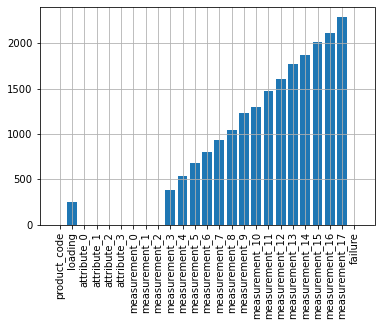

In [11]:
plt.bar(train.columns, [i for i in train.isna().sum()])
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

There are 16 variables has null values, the most one has 8.59% values are missing. There is not a large portion of missing value, so I would try **removing** them first.

In [12]:
data_remove = train.dropna(axis=0)

In [13]:
data_remove.shape[0]/train.shape[0]

0.4585246518630034

Turns our too many are removed, only less than 50% are kept.    
##### **Fill with mean**

In [14]:
data_fill_mean = train
data_fill_mean.shape

(26570, 25)

In [15]:
for col in data_fill_mean.columns[data_fill_mean.isna().sum() > 0]:
    mean = data_fill_mean[col].mean()
    data_fill_mean[col].fillna(mean, inplace = True)

In [16]:
data_fill_mean.isna().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

##### Imbalance?

In [21]:
train['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

There are 5649 failed and 20921 not failed. Do we need consider **resampling** to deal with **imbalance**? 

#### This is a binary classification problem, consider following methods:
* Random Forest classifier
* logistic regression
* XGBoost
* Decision tree??
* Neural network?

#### For the preprocessing, consider:
* Just drop the missing values
* Fill with mean (float)
* Random forest to fill in (least preference)

#### Random Forest Classifier (Fill with mean)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder

In [25]:
data_fill_mean_origin = data_fill_mean

In [28]:
data_fill_mean.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412,579.885,0


In [29]:
data_fill_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26570 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26570 non-null  float64
 10  measurement_4   26570 non-null  float64
 11  measurement_5   26570 non-null  float64
 12  measurement_6   26570 non-null  float64
 13  measurement_7   26570 non-null  float64
 14  measurement_8   26570 non-null  float64
 15  measurement_9   26570 non-null  float64
 16  measurement_10  26570 non-null  float64
 17  measurement_11  26570 non-null 

##### Change the object type to numerical

In [30]:
data_fill_mean['product_code'].unique() # There are five product code in this category

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [31]:
product = data_fill_mean['product_code'].unique().tolist()

In [32]:
data_fill_mean['product_code'] = data_fill_mean['product_code'].apply(lambda x: product.index(x)) # Maybe should use one hot encoding?

In [33]:
data_fill_mean['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [34]:
data_fill_mean['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

In [35]:
attr_0 = data_fill_mean['attribute_0'].unique().tolist()
attr_1 = data_fill_mean['attribute_1'].unique().tolist()

In [36]:
data_fill_mean['attribute_0'] = data_fill_mean['attribute_0'].apply(lambda x: attr_0.index(x))
data_fill_mean['attribute_1'] = data_fill_mean['attribute_1'].apply(lambda x: attr_1.index(x))

In [37]:
data_fill_mean.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,0,80.10,0,0,9,5,7,8,4,18.040,...,10.672,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684,764.100,0
1,0,84.89,0,0,9,5,14,3,3,18.213,...,12.448,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631,682.057,0
2,0,82.43,0,0,9,5,12,1,5,18.057,...,12.715,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946,663.376,0
3,0,101.07,0,0,9,5,13,2,6,17.295,...,12.471,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172,826.282,0
4,0,188.06,0,0,9,5,9,2,8,19.346,...,10.337,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412,579.885,0


##### Split training and testing

In [38]:
X = data_fill_mean[data_fill_mean.columns[:-1]]
y = data_fill_mean['failure']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y,
                                                test_size = 0.3)

In [39]:
for i in [Xtrain, Xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [40]:
Xtrain.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,2,122.54,0,0,5,8,0,16,4,18.442,...,19.071,12.459,16.645,18.226,11.702464,14.710,15.977,14.182,15.877,649.476
1,4,142.25,0,2,6,9,8,12,2,17.581,...,17.941,10.108,14.865,20.467,11.084000,15.396,15.491,15.219,15.219,462.515
2,1,146.57,1,1,8,8,4,8,4,18.014,...,20.649,10.901,17.770,18.709,12.951000,16.861,16.080,16.467,15.575,811.387
3,1,94.70,1,1,8,8,10,6,8,18.815,...,18.663,10.402,17.059,17.808,12.555000,15.996,15.500,16.346,19.331,828.251
4,4,128.56,0,2,6,9,5,17,1,18.088,...,18.280,13.401,17.044,18.987,9.826000,16.528,19.613,15.569,16.862,507.901


In [41]:
clf = DecisionTreeClassifier(random_state=0) # REMOVE random seed
clf = clf.fit(Xtrain, ytrain)

score_c = clf.score(Xtest, ytest)

print('CLF: {}'.format(score_c))

CLF: 0.6624012043658262


In [42]:
score = cross_val_score(clf, X, y, cv=10).mean()

In [43]:
score

0.6575461046292811

##### Try difference max_depth

In [44]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                criterion='entropy')
    clf = clf.fit(Xtrain, ytrain)
    score_tr = clf.score(Xtrain, ytrain)
    score_te = cross_val_score(clf, X, y, cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))

0.7873917952578096


In [47]:
te

[0.7873917952578096,
 0.7873917952578096,
 0.7871659766654122,
 0.7867143394806173,
 0.7853970643582989,
 0.7833646970267218,
 0.783214151298457,
 0.7801279638690252,
 0.7782461422657132,
 0.772713586751976]

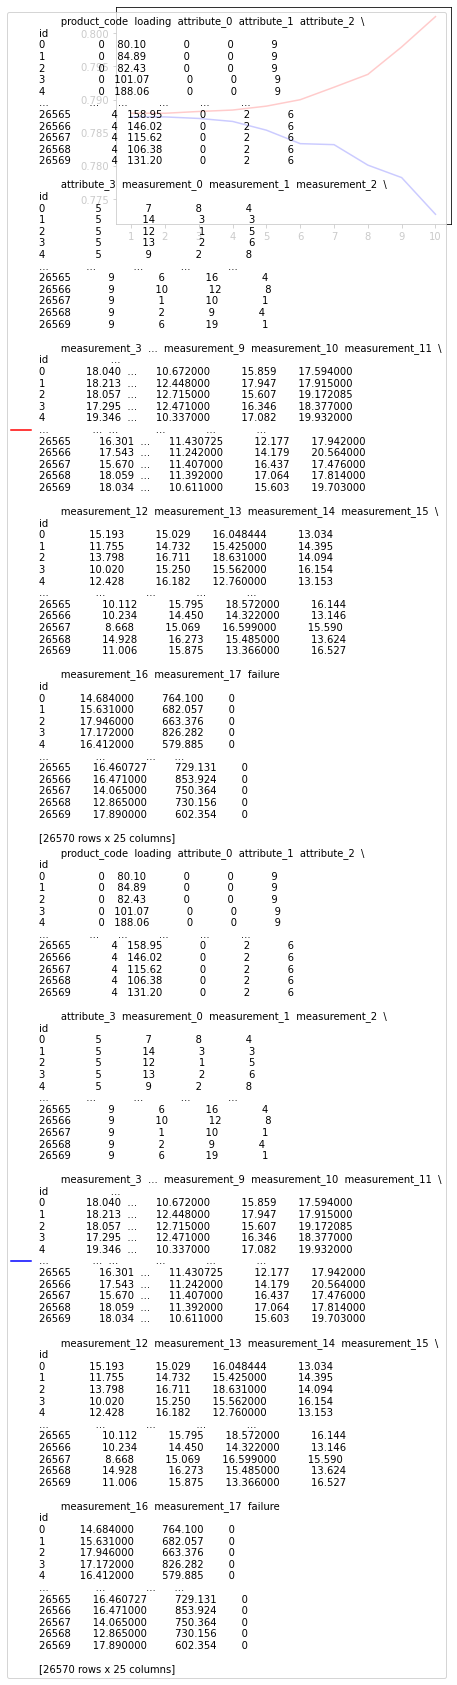

In [46]:
plt.plot(range(1, 11), tr, color='red', label = train)
plt.plot(range(1, 11), te, color='blue', label = train)
plt.xticks(range(1,11))
plt.legend()
plt.show()

# What's next:
* Grid search to find the best parameter
* Other model

##### Grid search

In [ ]:
gini_thresholds = np.linspace(0, 0.5, 20)

parameters = {'splitter': ('best', 'random'),
             'criterion': ('gini', 'entropy'),
             'max_depth': [*range(1, 50, 5)],
             'min_samples_leaf': [*range(1, 50, 5)],
             'min_impurity_decrease': [*np.linspace(0, 0.5, 20)]
             }

clf = DecisionTreeClassifier()
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain, ytrain)

In [51]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 46,
 'splitter': 'random'}

In [50]:
GS.best_score_

0.7881068848438575